In [13]:
!pip install lime
import os
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
print('Notebook run using keras:', keras.__version__)

     |████████████████████████████████| 274 kB 1.8 MB/s eta 0:00:01
     |████████████████████████████████| 3.7 MB 18.5 MB/s eta 0:00:01
  Created wheel for lime: filename=lime-0.2.0.0-py3-none-any.whl size=284180 sha256=a6d602dc4dd141c4f52f775458102fb6f9a267fd35d45591efc40972f614a4a6
  Stored in directory: /Users/craig/Library/Caches/pip/wheels/05/1a/3f/6b78b5cf3a5b8ed95a487c2539755c9e97907e53594dfe8e35
Successfully built lime
  Attempting uninstall: pillow
    Found existing installation: Pillow 6.2.0
    Uninstalling Pillow-6.2.0:
      Successfully uninstalled Pillow-6.2.0
You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Notebook run using keras: 2.3.1


In [39]:
def transform_img_fn(path_list):
    out = []
    for img_path in path_list:
        img = image.load_img(img_path, target_size=(32, 32))
        x = image.img_to_array(img)
        out.append(x)
    return np.vstack(out)

ValueError: Error when checking input: expected input_1 to have 4 dimensions, but got array with shape (32, 32, 3)

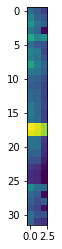

In [40]:
model = tf.keras.models.load_model('vgg19.h5')
images = transform_img_fn(["./wolf/dog.jpeg"])
# # I'm dividing by 2 and adding 0.5 because of how this Inception represents images
plt.imshow(images[0])
preds = model.predict(images)
print(preds)

In [22]:
%load_ext autoreload
%autoreload 2
import os,sys
try:
    import lime
except:
    sys.path.append(os.path.join('..', '..')) # add the current directory
    import lime
from lime import lime_image

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
%%time
explainer = lime_image.LimeImageExplainer()
# Hide color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
explanation = explainer.explain_instance(images[0], model.predict, top_labels=5, hide_color=0, num_samples=1000)

IndexError: index 255 is out of bounds for axis 1 with size 1

In [17]:
from skimage.segmentation import mark_boundaries

In [19]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

NameError: name 'explanation' is not defined